In [1]:
import pandas as pd 
import numpy as np 
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import calendar
import seaborn as sns

In [2]:
kpiName = 'MoU Overall'
circleName = 'MAHARASHTRA'
howIndiaTalksDf = pd.read_csv('C:/Users/piyush12.kumar/PycharmProjects/fileRead/foreCasting/how_india_talks_[2019-11-01, 2020-02-23].csv')
howIndiaTalksDf = howIndiaTalksDf.loc[howIndiaTalksDf['CIRCLE'] == circleName]
howIndiaTalksDf[['First', 'Last']] = howIndiaTalksDf.TIME_STAMP.str.split(" ", expand=True, )
howIndiaTalksDf = howIndiaTalksDf.loc[howIndiaTalksDf['Last'] == "16"]
data = howIndiaTalksDf[['TIME_STAMP', kpiName]]
data.head()

,TIME_STAMP,MoU Overall
380,2019-11-01 16,36557861.15
932,2019-11-02 16,36197072.99
1484,2019-11-03 16,33305300.94
2036,2019-11-04 16,37308981.02
2588,2019-11-05 16,37237728.36


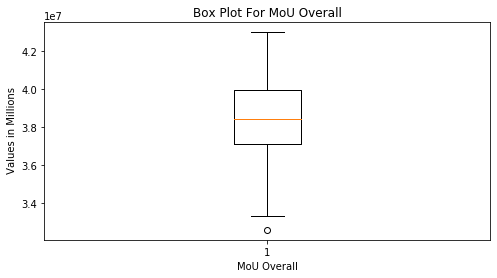

In [3]:
data.columns = [c.replace(' ', '_') for c in data.columns]
plt.figure(figsize=(8,4))
plt.boxplot(data.MoU_Overall)
plt.title('Box Plot For MoU Overall')
plt.xlabel('MoU Overall')
plt.ylabel(' Values in Millions')
plt.show()

In [4]:
dates = pd.date_range(start='2019-11-01 16:00:00', freq='D', periods=len(data))
dates[0:5]

DatetimeIndex(['2019-11-01 16:00:00', '2019-11-02 16:00:00',
               '2019-11-03 16:00:00', '2019-11-04 16:00:00',
               '2019-11-05 16:00:00'],
              dtype='datetime64[ns]', freq='D')

In [5]:
data.set_index('TIME_STAMP',inplace=True)
data.head()

,MoU_Overall
TIME_STAMP,
2019-11-01 16,36557861.15
2019-11-02 16,36197072.99
2019-11-03 16,33305300.94
2019-11-04 16,37308981.02
2019-11-05 16,37237728.36


In [6]:
mou_ts = data['MoU_Overall']
mou_ts[0:5]

TIME_STAMP
2019-11-01 16    36557861.15
2019-11-02 16    36197072.99
2019-11-03 16    33305300.94
2019-11-04 16    37308981.02
2019-11-05 16    37237728.36
Name: MoU_Overall, dtype: float64

In [7]:
# Modeling
data = pd.DataFrame(mou_ts.copy())
data.head()

,MoU_Overall
TIME_STAMP,
2019-11-01 16,36557861.15
2019-11-02 16,36197072.99
2019-11-03 16,33305300.94
2019-11-04 16,37308981.02
2019-11-05 16,37237728.36


In [8]:
# 1. Regression on time


time = [i+1 for i in range(len(data))]
# Splitting Train and Test Length
train_len = int(np.ceil(len(data) * 0.75))
train_len

87

In [10]:
data1 = data.copy()
data1['time'] = time
train=data1[0:train_len] 
test=data1[train_len:]

train.head()

,MoU_Overall,time
TIME_STAMP,,
2019-11-01 16,36557861.15,1
2019-11-02 16,36197072.99,2
2019-11-03 16,33305300.94,3
2019-11-04 16,37308981.02,4
2019-11-05 16,37237728.36,5


In [11]:
print('Train data length :',len(train))
print('Test  data length :',len(test))

Train data length : 87
Test  data length : 28


In [13]:

x_train = train.drop('MoU_Overall',axis=1)
x_test = test.drop('MoU_Overall', axis=1)
y_train = train[['MoU_Overall']]
y_test = test[['MoU_Overall']]

In [14]:
# Linear Regression
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
predictions = model.predict(x_test)
y_test['RegOnTime'] = predictions

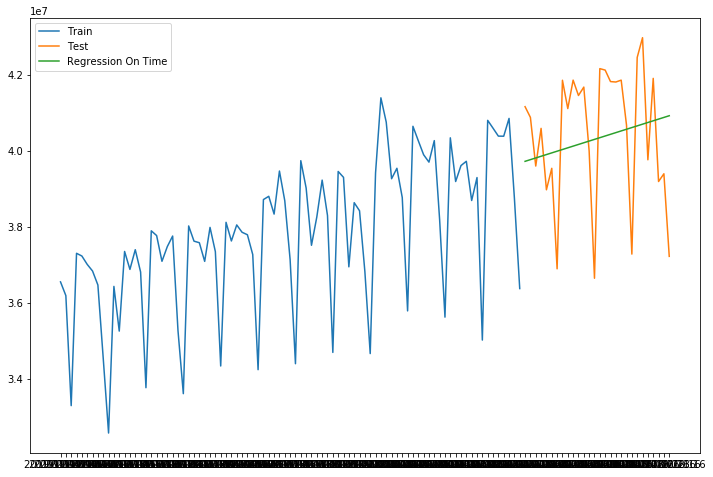

In [18]:
plt.figure(figsize=(12,8))
plt.plot( train['MoU_Overall'], label='Train')
plt.plot(test['MoU_Overall'], label='Test')
plt.plot(y_test['RegOnTime'], label='Regression On Time')
plt.legend(loc='best')
plt.show()

In [19]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test.MoU_Overall, y_test.RegOnTime))
rmse = round(rmse, 3)

In [21]:
# Mean Absolute Percentage Error
abs_error = np.abs(y_test['MoU_Overall']-y_test['RegOnTime'])
actual = y_test['MoU_Overall']
mape = np.round(np.mean(abs_error/actual),3)
resultsDf = pd.DataFrame({'Method':['RegressionOnTime'], 'RMSE': [rmse]})
resultsDf

,Method,RMSE
0,RegressionOnTime,1802898.173


In [22]:
# Storing results in a dataframe
# MAPE = mean absolute percentage error
resultsDf = pd.DataFrame({'Method':['RegressionOnTime'], 'MAPE': [mape], 'RMSE': [rmse]})
resultsDf = resultsDf[['Method', 'RMSE', 'MAPE']]
resultsDf

,Method,RMSE,MAPE
0,RegressionOnTime,1802898.173,0.039


In [50]:
# Regression on time with seasonal component
time = [i+1 for i in range(len(data))]
data1 = data.copy()
data1['time'] = time
data1.head()

,MoU_Overall,time
TIME_STAMP,,
2019-11-01 16,36557861.15,1
2019-11-02 16,36197072.99,2
2019-11-03 16,33305300.94,3
2019-11-04 16,37308981.02,4
2019-11-05 16,37237728.36,5


In [52]:
dates = pd.date_range(start='2019-11-01 16:00:00', freq='D', periods=len(data))
dates[0:5]

DatetimeIndex(['2019-11-01 16:00:00', '2019-11-02 16:00:00',
               '2019-11-03 16:00:00', '2019-11-04 16:00:00',
               '2019-11-05 16:00:00'],
              dtype='datetime64[ns]', freq='D')

In [53]:
# data1['yearSeasonality']= dates.year
# data1['daySeasonality']= dates.day
# data1['monthSeasonality']= dates.month
# data1['weekSeasonality']= dates.week

weekSeasonality = ['w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7']
even = weekSeasonality*16 
last = ['w1', 'w2', 'w3']
data1['weekSeasonality'] = even + last
data1.head()

,MoU_Overall,time,weekSeasonality
TIME_STAMP,,,
2019-11-01 16,36557861.15,1,w1
2019-11-02 16,36197072.99,2,w2
2019-11-03 16,33305300.94,3,w3
2019-11-04 16,37308981.02,4,w4
2019-11-05 16,37237728.36,5,w5


In [54]:
data1.tail()

,MoU_Overall,time,weekSeasonality
TIME_STAMP,,,
2020-02-19 16,39766802.17,111,w6
2020-02-20 16,41906162.62,112,w7
2020-02-21 16,39195497.92,113,w1
2020-02-22 16,39399048.24,114,w2
2020-02-23 16,37228794.62,115,w3


In [55]:
data1Complete = pd.get_dummies(data1, drop_first=True)
data1Complete.head(2).T

TIME_STAMP,2019-11-01 16,2019-11-02 16
MoU_Overall,36557861.15,36197072.99
time,1.00,2.00
weekSeasonality_w2,0.00,1.00
weekSeasonality_w3,0.00,0.00
weekSeasonality_w4,0.00,0.00
weekSeasonality_w5,0.00,0.00
weekSeasonality_w6,0.00,0.00
weekSeasonality_w7,0.00,0.00


In [56]:
#Creating train and test set 
train=data1Complete[0:train_len] 
test=data1Complete[train_len:]

In [57]:
x_train = train.drop('MoU_Overall', axis=1)
x_test = test.drop('MoU_Overall', axis=1)
y_train = train[['MoU_Overall']]
y_test = test[['MoU_Overall']]
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

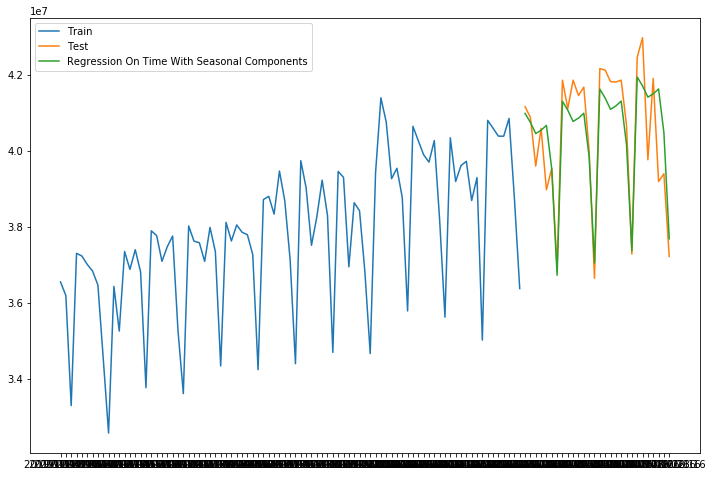

In [58]:
predictions = model.predict(x_test)

# print(predictions)
y_test['RegOnTimeSeasonal'] = predictions
# y_test.head()
plt.figure(figsize=(12,8))
plt.plot( train['MoU_Overall'], label='Train')
plt.plot(test['MoU_Overall'], label='Test')
plt.plot(y_test['RegOnTimeSeasonal'], label='Regression On Time With Seasonal Components')
plt.legend(loc='best')
plt.show()

In [59]:
y_test.head()

,MoU_Overall,RegOnTimeSeasonal
TIME_STAMP,,
2020-01-27 16,41162680.46,4.098486e+07
2020-01-28 16,40880855.59,4.075097e+07
2020-01-29 16,39602323.77,4.045549e+07
2020-01-30 16,40592439.16,4.054281e+07
2020-01-31 16,38978357.58,4.067108e+07


In [60]:
rmse = np.sqrt(mean_squared_error(test.MoU_Overall, y_test.RegOnTimeSeasonal))
rmse = round(rmse, 3)
# Mean Absolute Percentage Error
abs_error = np.abs(y_test['MoU_Overall']-y_test['RegOnTimeSeasonal'])
actual = y_test['MoU_Overall']
mape = np.round(np.mean(abs_error/actual),4)
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Method':['RegressionOnTimeSeasonal'], 'RMSE': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'RMSE', 'MAPE']]
resultsDf

,Method,RMSE,MAPE
0,RegressionOnTime,1802898.173,0.0390
0,RegressionOnTimeSeasonal,856658.111,0.0161


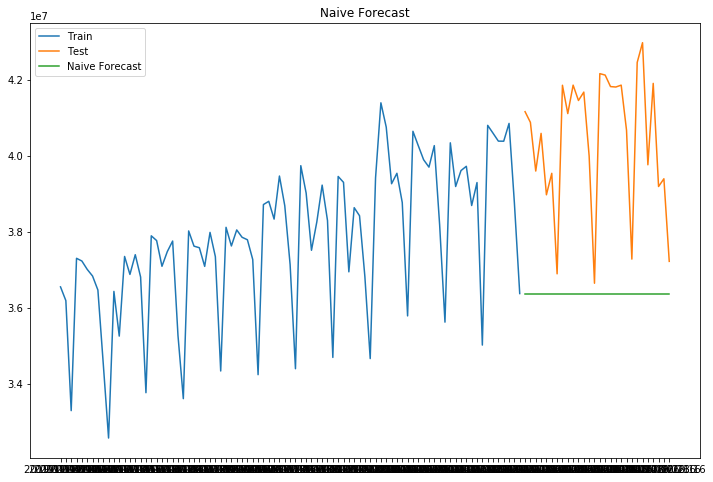

In [61]:
# 3.Naive approach

dd= np.asarray(train.MoU_Overall)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['MoU_Overall'], label='Train')
plt.plot(test.index,test['MoU_Overall'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [62]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test.MoU_Overall, y_hat.naive))
rmse = round(rmse, 3)
# Mean Absolute Percentage Error
abs_error = np.abs(y_test['MoU_Overall']-y_hat.naive)
actual = y_test['MoU_Overall']
mape = np.round(np.mean(abs_error/actual),4)
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Method':['Naive forecast'], 'RMSE': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'RMSE', 'MAPE']]
resultsDf

,Method,RMSE,MAPE
0,RegressionOnTime,1802898.173,0.0390
0,RegressionOnTimeSeasonal,856658.111,0.0161
0,Naive forecast,4441011.538,0.0991


In [ ]:
# Naive's scores are the base score for a model since it is taking just the previous value of the series. Linear Regression with Time and Seasonal has shown better performance than on Time.